In [1]:
# %pylab notebook
%pylab inline
import pandas as pd
import xarray as xr
import glob, re, os
import scipy
import pickle
import datetime
import netCDF4
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
# load the notebook import module, refer to $HOME/usr/szhu_setting/python/szpy, set as $PYTHONPATH
from szpy import nbimport
import szpy.sz as sz

## For debug mode
from IPython.core.debugger import Tracer
#Tracer()() #this one triggers the debugger

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.widgets import Slider, Button, RadioButtons
# from importlib import reload

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Change the working directory to hiwc folder
workdir = os.getcwd()
print(os.getcwd())
# For windows home machine.
os.chdir('D:\shared\gmaildrive\hiwc')
print(os.getcwd())

# Require 'from szpy import nbimport'
ers = __import__('20170523ellipsoid')
# reload(ers)

D:\shared\workdir
D:\shared\gmaildrive\hiwc
importing Jupyter notebook from 20170523ellipsoid.ipynb
Populating the interactive namespace from numpy and matplotlib


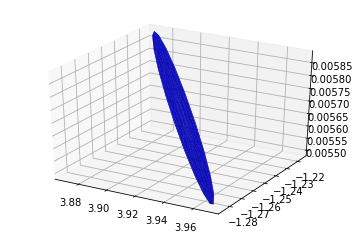

In [3]:
ers.f_plot_E(ers.f_geneigvector(ers.psd))

In [3]:
# Read all source data file for Darwin campaign
# campaign = 'cayenne'
campaign = 'darwin'
sfsrc, ikpsrc, cdpsrc, robsrc, lampsrc = [
    xr.open_dataset(
        'tmp/' + campaign + '/' + campaign + '_sync_bulk.nc', group='/' + x)
    for x in ['saffire', 'ikp', 'cdp', 'robust', 'lampproc']
]

rastanamelist = ['w_ret', 'Mask_Vz', 'height_2D', 'w_wind']
rastasrc = xr.merge([
    xr.open_dataset(
        'tmp/' + campaign + '/' + campaign + '_rasta.nc', group='/' + x)
    for x in rastanamelist
])

mtsatsrc = xr.open_dataset(
    'tmp/' + campaign + '/' + campaign + '_mtsat.nc',
    group='/mtsatproc',
    decode_cf=False)
# Note [] {} are comprehension for lsit and dict, while () is a generator, not a tuple compreh
[mtsatsrc[x].attrs.pop('missing_value') for x in ['longitude', 'latitude']]
mtsatsrc = xr.conventions.decode_cf(mtsatsrc)
mtsatsrc['index'] = xr.DataArray(
    np.array(range(mtsatsrc.dims['timeutc'])), dims=['timeutc'])

modelsrc = xr.open_dataset('tmp/' + campaign + '/' + 'ecmwf.nc')
sdsrc = xr.open_dataset(
    'tmp/' + campaign + '/' + campaign + '_sync_gz.nc', group='/lamp')
bin_div = sdsrc.bin_div
bin_diff = diff(bin_div)
bin_mid = (bin_div[1:] + bin_div[:-1]) / 2

C:\Anaconda3\envs\py36\lib\site-packages\xarray\conventions.py:838: UserWarning: CF decoding is overwriting dtype
  warnings.warn("CF decoding is overwriting dtype")


In [4]:
# Read all source data file for Cayenne campaign
campaign = 'cayenne'
# campaign = 'darwin'
sfsrc, ikpsrc, cdpsrc, robsrc, lampsrc = [
    xr.open_dataset(
        'tmp/' + campaign + '/' + campaign + '_sync_bulk.nc', group='/' + x)
    for x in ['saffire', 'ikp', 'cdp', 'robust', 'lampproc']
]

rastanamelist = ['w_ret', 'Mask_Vz', 'height_2D', 'w_wind']
rastasrc = xr.merge([
    xr.open_dataset(
        'tmp/' + campaign + '/' + campaign + '_rasta.nc', group='/' + x)
    for x in rastanamelist
])

mtsatsrc = xr.open_dataset(
    'tmp/' + campaign + '/' + campaign + '_mtsat.nc',
    group='/mtsatproc',
    decode_cf=True)
# Note [] {} are comprehension for lsit and dict, while () is a generator, not a tuple compreh
mtsatsrc['index'] = xr.DataArray(
    np.array(range(mtsatsrc.dims['timeutc'])), dims=['timeutc'])

modelsrc = xr.open_dataset('tmp/' + campaign + '/' + 'ecmwf.nc')
sdsrc = xr.open_dataset(
    'tmp/' + campaign + '/' + campaign + '_sync_gz.nc', group='/lamp')
bin_div = sdsrc.bin_div
bin_diff = diff(bin_div)
bin_mid = (bin_div[1:] + bin_div[:-1]) / 2

In [5]:
# sf, ikp, cdp, rob, lamp
!ncdump -h tmp/darwin/darwin_sync_bulk.nc

netcdf tmp/darwin/darwin_sync_bulk {

// global attributes:
		:_NCProperties = "version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17" ;

group: saffire {
  dimensions:
  	timeutc = UNLIMITED ; // (290183 currently)
  variables:
  	int64 timeutc(timeutc) ;
  		timeutc:units = "seconds since 2014-01-16 01:22:15" ;
  		timeutc:calendar = "proleptic_gregorian" ;
  	double Timeinsecond(timeutc) ;
  		Timeinsecond:_FillValue = NaN ;
  	double event_marker(timeutc) ;
  		event_marker:_FillValue = NaN ;
  	double latitude(timeutc) ;
  		latitude:_FillValue = NaN ;
  	double longitude(timeutc) ;
  		longitude:_FillValue = NaN ;
  	double altitude_gps(timeutc) ;
  		altitude_gps:_FillValue = NaN ;
  	double altitude_airins(timeutc) ;
  		altitude_airins:_FillValue = NaN ;
  	double platform_roll_angle(timeutc) ;
  		platform_roll_angle:_FillValue = NaN ;
  	double platform_pitch_angle(timeutc) ;
  		platform_pitch_angle:_FillValue = NaN ;
  	double platform_orientation(timeutc) ;
  		platform_

In [6]:
# rasta
!ncdump -h tmp/darwin/darwin_rasta.nc

netcdf tmp/darwin/darwin_rasta {
dimensions:
	timeutc = UNLIMITED ; // (290183 currently)
variables:
	int64 timeutc(timeutc) ;
		timeutc:units = "seconds since 2014-01-16T01:22:15" ;
		timeutc:calendar = "proleptic_gregorian" ;

group: latitude {
  dimensions:
  	timeutc = UNLIMITED ; // (290183 currently)
  variables:
  	int64 timeutc(timeutc) ;
  		timeutc:units = "seconds since 2014-01-16 01:22:15" ;
  		timeutc:calendar = "proleptic_gregorian" ;
  	double latitude(timeutc) ;
  		latitude:_FillValue = NaN ;
  		latitude:units = "degrees north" ;
  		latitude:long_name = "Latitude of the aircraft" ;
  		latitude:comments = "from Global Positioning System (GPS)" ;
  } // group latitude

group: longitude {
  dimensions:
  	timeutc = UNLIMITED ; // (290183 currently)
  variables:
  	int64 timeutc(timeutc) ;
  		timeutc:units = "seconds since 2014-01-16 01:22:15" ;
  		timeutc:calendar = "proleptic_gregorian" ;
  	double longitude(timeutc) ;
  		longitude:_FillValue = NaN ;
  		longitude

In [7]:
# mtsat
!ncdump -h tmp/darwin/darwin_mtsat.nc

netcdf tmp/darwin/darwin_mtsat {

// global attributes:
		:_NCProperties = "version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17" ;

group: mtsatproc {
  dimensions:
  	timeutc = UNLIMITED ; // (290183 currently)
  variables:
  	int64 timeutc(timeutc) ;
  		timeutc:units = "seconds since 2014-01-16 01:22:15" ;
  		timeutc:calendar = "proleptic_gregorian" ;
  	int64 timelag(timeutc) ;
  		timelag:units = "seconds" ;
  	byte validlagmask(timeutc) ;
  		validlagmask:dtype = "bool" ;
  	double latitude(timeutc) ;
  		latitude:_FillValue = NaN ;
  		latitude:valid_min = -90.f ;
  		latitude:valid_max = 90.f ;
  		latitude:long_name = "latitude" ;
  		latitude:units = "degrees_north" ;
  		latitude:missing_value = "-99999." ;
  	double longitude(timeutc) ;
  		longitude:_FillValue = NaN ;
  		longitude:valid_min = -180.f ;
  		longitude:valid_max = 180.f ;
  		longitude:long_name = "longitude" ;
  		longitude:units = "degrees_east" ;
  		longitude:missing_value = "-99999." ;
  	double refl

In [9]:
# model
!ncdump -h tmp/darwin/ecmwf.nc

netcdf tmp/darwin/ecmwf {
dimensions:
	timemod = 236 ;
	level = 37 ;
	lat = 43 ;
	lon = 71 ;
variables:
	int64 timemod(timemod) ;
		timemod:units = "hours since 2014-01-01 00:00:00" ;
		timemod:calendar = "proleptic_gregorian" ;
	double level(level) ;
		level:_FillValue = NaN ;
		level:units = "hPa" ;
	double lat(lat) ;
		lat:_FillValue = NaN ;
		lat:units = "degree north" ;
	double lon(lon) ;
		lon:_FillValue = NaN ;
		lon:units = "degree east" ;
	double Potential\ vorticity(timemod, level, lat, lon) ;
		Potential\ vorticity:_FillValue = NaN ;
		Potential\ vorticity:units = "K m**2 kg**-1 s**-1" ;
	double Geopotential(timemod, level, lat, lon) ;
		Geopotential:_FillValue = NaN ;
		Geopotential:units = "m**2 s**-2" ;
	double Temperature(timemod, level, lat, lon) ;
		Temperature:_FillValue = NaN ;
		Temperature:units = "K" ;
	double Specific\ humidity(timemod, level, lat, lon) ;
		Specific\ humidity:_FillValue = NaN ;
		Specific\ humidity:units = "kg kg**-1" ;
	double Vertical\ velocity

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in greater


1 Emtpy!
5 Emtpy!
7 Emtpy!
17 Emtpy!
21 Emtpy!


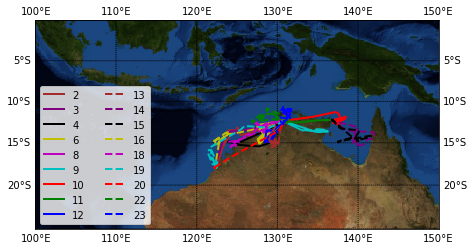

In [29]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'brown']
linestyle = ['--', '-']
kws = [{'color': x, 'linestyle': y} for y in linestyle for x in colors]

lonlat = [100, 150, -25, 0]
# plt.figure(figsize=(11, 11))
m = Basemap(
    llcrnrlon=lonlat[0],
    llcrnrlat=lonlat[2],
    urcrnrlon=lonlat[1],
    urcrnrlat=lonlat[3],
    projection='merc',
    fix_aspect=True,
    resolution=None)
m.bluemarble()
m.drawmeridians(np.arange(lonlat[0], lonlat[1] + 0.1, 10), labels=[1, 1, 1, 1])
m.drawparallels(np.arange(lonlat[2], lonlat[3] + 0.1, 5), labels=[1, 1, 1, 1])

mlon, mlat = m(sfsrc.longitude.values, sfsrc.latitude.values)
for szi in range(1, 24):
    tmpind = (sfsrc.flightnum.values == szi)
    tmpiwc = ikpsrc.XKBZR5s.values[tmpind] > 1.5
    if not any(tmpiwc):
        print(str(szi) + ' Emtpy!')
        continue
    kw = kws.pop()
    plt.plot(mlon[tmpind], mlat[tmpind], label=str(szi), lw=2, **kw)

plt.legend(ncol=2)
plt.tight_layout()
fig = plt.gcf()

fig.savefig(
    workdir + '/fig/darwin_flt.pdf', transparent=True, bbox_inches='tight')

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: invalid value encountered in greater


9 Emtpy!
12 Emtpy!


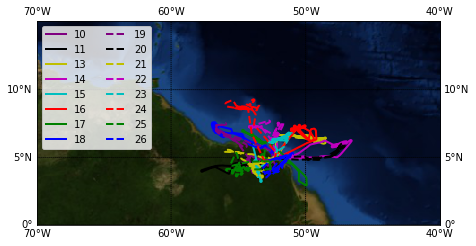

In [22]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'brown']
colors = colors[0:8]
linestyle = ['--', '-']
kws = [{'color': x, 'linestyle': y} for y in linestyle for x in colors]

lonlat = [-70, -40, 0, 15]
# plt.figure(figsize=(11, 11))
m = Basemap(
    llcrnrlon=lonlat[0],
    llcrnrlat=lonlat[2],
    urcrnrlon=lonlat[1],
    urcrnrlat=lonlat[3],
    projection='merc',
    fix_aspect=True,
    resolution=None)
m.bluemarble()
m.drawmeridians(np.arange(lonlat[0], lonlat[1] + 0.1, 10), labels=[1, 1, 1, 1])
m.drawparallels(np.arange(lonlat[2], lonlat[3] + 0.1, 5), labels=[1, 1, 1, 1])

mlon, mlat = m(sfsrc.longitude.values, sfsrc.latitude.values)
for szi in range(9, 27):
    tmpind = (sfsrc.flightnum.values == szi)
    tmpiwc = ikpsrc.XKBZR5s.values[tmpind] > 1.5
    if not any(tmpiwc):
        print(str(szi) + ' Emtpy!')
        continue
    kw = kws.pop()
    plt.plot(mlon[tmpind], mlat[tmpind], label=str(szi), lw=2, **kw)

plt.legend(ncol=2)
plt.tight_layout()
fig = plt.gcf()

fig.savefig(
    workdir + '/fig/cayenne_flt.pdf', transparent=True, bbox_inches='tight')

In [46]:
# routine to select a subset of all data except ECMWF model
# selind = np.where(sfsrc.flightnum.values==13)[0]
selind = np.where((ikpsrc.XKBZR5s.values > .5) &
                  (sfsrc.air_temperature_rm.values < -15))[0]
#                  & (lampsrc.validbinnum.values>300) )[0]
sf, ikp, cdp, rob, lamp, rasta, mtsat, sd = [
    x.isel(timeutc=selind)
    for x in
    [sfsrc, ikpsrc, cdpsrc, robsrc, lampsrc, rastasrc, mtsatsrc, sdsrc]
]

/data/keeling/a/szhu28/usr/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/data/keeling/a/szhu28/usr/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
